In [5]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
matplotlib.rc('font',family = 'Malgun Gothic')
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes",unicode_minus = False)
import pandas as pd
df1 = pd.read_csv('bank.csv')

In [6]:
df1

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [7]:
# bad (y) : 대출상한 여부 0 상환 / 1 미상환
# load : 총대출액 
# mortdue : 저당액 
# value : 재산액 
# reason : debtcon(채무정리) , 주택개량(homeimp)
# job : mgr( 노동자) , office (사무원) , 숙련기술사 (proexe) , 기타 (other), 판매원 (sales), 자영업 (self)
# yoj : 직장근무년수
# debtinc : 대출금 대 수입의 비율
# delenq : 체납횟수
# clage : 최장 대출기간 
# minq : 최근 신용거래 요청 횟수 
# clno : 신용거래 회수

# 개선 사항 
# 플랫폼 활용을 통한 접근성 강회
# 상관계획 가이드라인 제시
# 저 신용자대상 신용도 관리 교육 실시 

# 고객분할 예씨 
# 중저 - 가이드라인 
# 고 - 알아서 잘함 

In [8]:
df1.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [9]:
df2 = df1.dropna()

In [10]:
df2.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

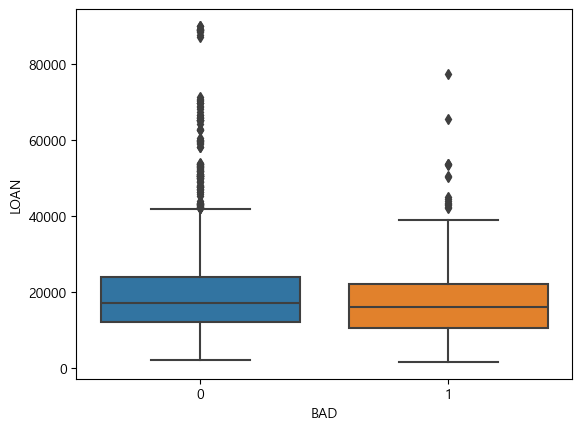

In [11]:
import seaborn as sns
sns.boxplot(x='BAD', y = "LOAN",data = df2)
plt.show()

In [12]:
BAD_L = df2[df2['BAD'] == 0]['LOAN']   # 상환  
good_L = df2[df2['BAD'] == 1]['LOAN']  # 미상환 

# 상환 여부에 따라서 대출액이 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 대출액이 차이가 없다 -> 귀무가설 참 => 상환 여부에 따라서 대출액이 차이가 없다
# 대립가설 : 상환 여부에 따라서 대출액이 차이가 있다 

weight_result= stats.ttest_ind(BAD_L,good_L)
t,p = weight_result.statistic, weight_result.pvalue
print("대출액-sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

대출액-sample t-test
t:1.8107903090158013
p:0.07026254176612239


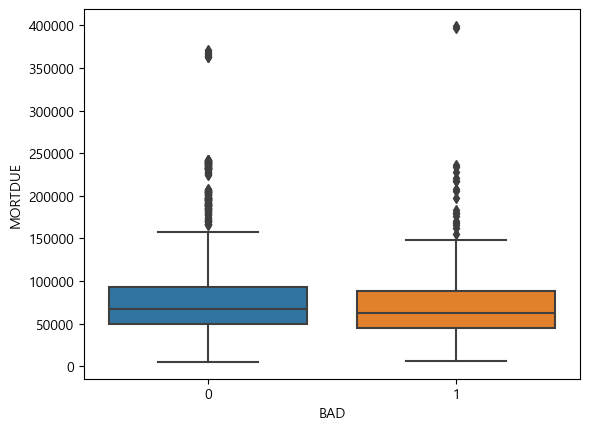

In [13]:
import seaborn as sns
sns.boxplot(x='BAD', y = "MORTDUE",data = df2)
plt.show()

In [51]:
BAD_M = df2[df2['BAD'] == 0]['MORTDUE']   # 저당금액
good_M = df2[df2['BAD'] == 1]['MORTDUE'] 

# 상환 여부에 따라서 저당금액 차이가 있는가
# 귀무가설 : 상환 여부에 저당금액  차이가 없다 -> 귀무가설 참 => o 
# 대립가설 : 상환 여부에 저당금액  차이가 있다 

weight_result= stats.ttest_ind(BAD_M,good_M)
t,p = weight_result.statistic, weight_result.pvalue
print("저당금액-sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

저당금액-sample t-test
t:0.9598857102123596
p:0.337181764200601


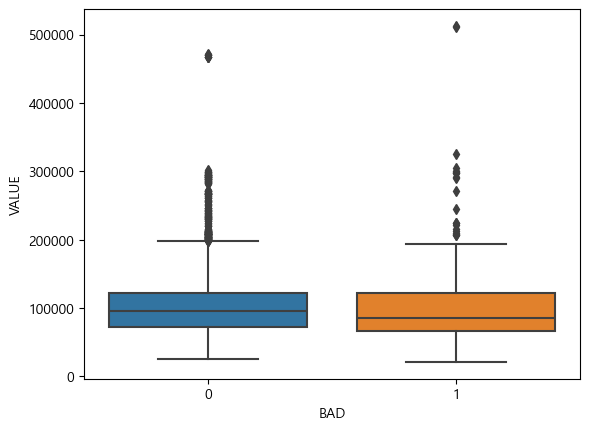

In [14]:
sns.boxplot(x='BAD', y = "VALUE",data = df2)
plt.show()

In [15]:
BAD_V = df2[df2['BAD'] == 0]['VALUE']   # 자산금액  
good_V = df2[df2['BAD'] == 1]['VALUE']  

# 상환 여부에 따라서 자산금액 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 자산금액 차이가 없다 -> 귀무가설 참 => 상환 여부에 따라서 자신금액이 차이가 없다
# 대립가설 : 상환 여부에 따라서 자산금액 차이가 있다 

weight_result= stats.ttest_ind(BAD_V,good_V)
t,p = weight_result.statistic, weight_result.pvalue
print("자산금액 -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

자산금액 -sample t-test
t:1.5205382836316168
p:0.12846978142805315


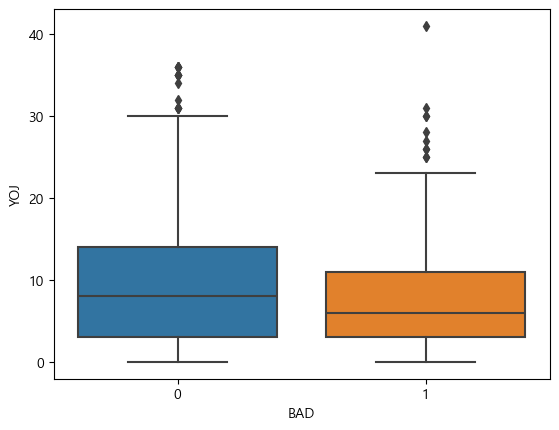

In [16]:
sns.boxplot(x='BAD', y = "YOJ",data = df2)
plt.show()

In [17]:
BAD_Y = df2[df2['BAD'] == 0]['YOJ']   # 근무년수  
good_Y = df2[df2['BAD'] == 1]['YOJ']  

# 상환 여부에 따라서 저당금액에 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 근무년수에 차이가 없다 -> 
# 대립가설 : 상환 여부에 따라서 근무년수에 차이가 있다 -> O 

weight_result= stats.ttest_ind(BAD_Y,good_Y)
t,p = weight_result.statistic, weight_result.pvalue
print("근무년수 -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

근무년수 -sample t-test
t:3.7347961327294983
p:0.00019098363769161364


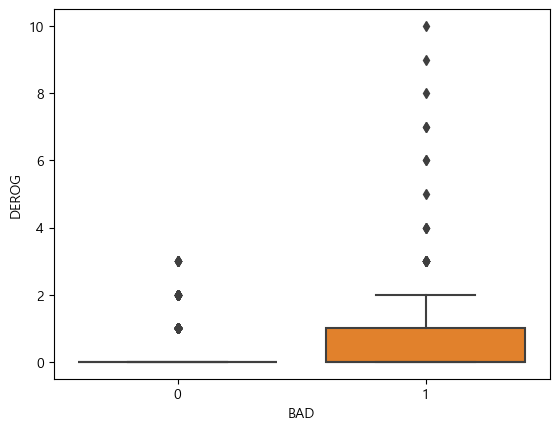

In [18]:
sns.boxplot(x='BAD', y = "DEROG",data = df2)  # 불량거래 보고수 
plt.show()

In [19]:
BAD_Y = df2[df2['BAD'] == 0]['DEROG']   # 불량거래수  
good_Y = df2[df2['BAD'] == 1]['DEROG']  

# 상환 여부에 따라서 불량거래수 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 불량거래수 차이가 없다 -> 
# 대립가설 : 상환 여부에 따라서 불량거래수 차이가 있다 -> O 

weight_result= stats.ttest_ind(BAD_Y,good_Y)
t,p = weight_result.statistic, weight_result.pvalue
print("불량거래수 -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

불량거래수 -sample t-test
t:-15.20846573781338
p:1.4426102363515305e-50


In [20]:
df2['DEROG'].value_counts()

DEROG
0     3052
1      200
2       79
3       22
4        3
6        2
7        2
5        1
8        1
10       1
9        1
Name: count, dtype: int64

In [21]:
df2['DEROG_flag'] = np.where(df2['DEROG'] == 0, 0, np.where(df2['DEROG'] == 1, 1, 2))

In [22]:
df2['DEROG_flag'].value_counts()

DEROG_flag
0    3052
1     200
2     112
Name: count, dtype: int64

In [23]:
# 상환 여부에 따라서 불량거래수간의 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 불량거래수간의 차이가 없다 
# 대립가설 : 상환 여부에 따라서 불량거래수간의 차이가 있다 -> o 
contingency_table_der = pd.crosstab(df2['BAD'], df2['DEROG_flag'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_der)
print('test statistic : {}, p-value : {}'.format(chi2, p))

test statistic : 165.05799218215853, p-value : 1.439171004804811e-36


In [26]:
df2['DELINQ_flag'] = np.where(df2['DELINQ'] == 0, 0, np.where(df2['DELINQ'] == 1, 1, 2))

In [28]:
df2['DELINQ_flag'].value_counts()

DELINQ_flag
0    2824
1     324
2     216
Name: count, dtype: int64

In [29]:
# 상환 여부에 따라서 채납횟수에 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 채납횟수에 차이가 없다 
# 대립가설 : 상환 여부에 따라서 채납횟수에 차이가 있다 -> o 
contingency_table_del = pd.crosstab(df2['BAD'], df2['DELINQ_flag'])  
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_del)
print('test statistic : {}, p-value : {}'.format(chi2, p))

test statistic : 164.74077673432274, p-value : 1.6865330643331933e-36


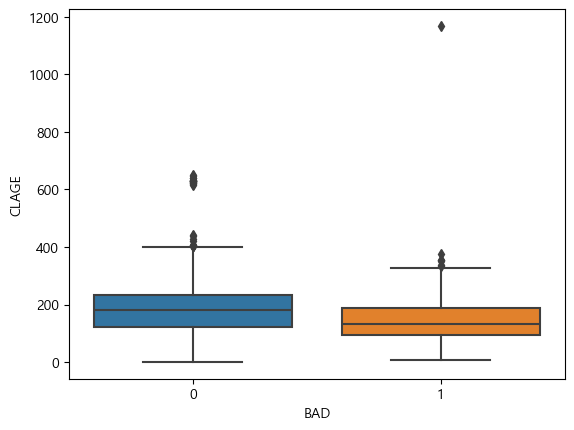

In [41]:
sns.boxplot(x='BAD', y = "CLAGE",data = df2)  # 최장대출기간  
df2.drop(df2[df2['CLAGE'] > 1000].index)
plt.show()

In [42]:
BAD_b = df2[df2['BAD'] == 0]['CLAGE']   # 최장대출기간  
good_b = df2[df2['BAD'] == 1]['CLAGE']  

# 상환 여부에 따라서 최장대출기간에 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 최장대출기간에 차이가 없다 -> 
# 대립가설 : 상환 여부에 따라서 최장대출기간에 차이가 있다 -> O 

weight_result= stats.ttest_ind(BAD_b,good_b)
t,p = weight_result.statistic, weight_result.pvalue
print("최장대출기간 -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

최장대출기간 -sample t-test
t:6.64783598711819
p:3.457200823193547e-11


In [43]:
df2['NINQ_flag'] = np.where(df2['NINQ'] == 0, 0, np.where(df2['NINQ'] == 1, 1, 2))
df2['NINQ_flag'].value_counts()

NINQ_flag
0    1672
2     872
1     820
Name: count, dtype: int64

In [44]:
# 상환 여부에 따라서 최근 신용도 차이가 있는가  #최근 신용도
# 귀무가설 : 상환 여부에 따라서 최근 신용도 차이가 없다 
# 대립가설 : 상환 여부에 따라서 최근 신용도 차이가 있다 -> o
contingency_table_der = pd.crosstab(df2['BAD'], df2['NINQ_flag'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_der)
print('test statistic : {}, p-value : {}'.format(chi2, p))

test statistic : 24.121849912338774, p-value : 5.781051588108365e-06


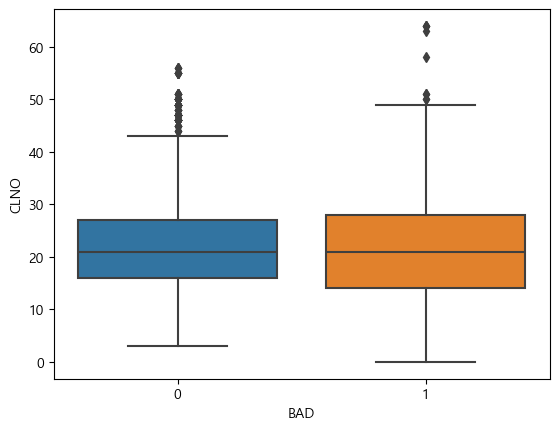

In [45]:
sns.boxplot(x='BAD', y = "CLNO",data = df2)  # 금융 거래수 
plt.show()

In [46]:
BAD_b = df2[df2['BAD'] == 0]['CLNO']   # 금융거래수  
good_b = df2[df2['BAD'] == 1]['CLNO']  

# 상환 여부에 따라서 금융거래수에 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 금융거래수에 차이가 없다 -> o
# 대립가설 : 상환 여부에 따라서 금융거래수에 차이가 있다 -> 

weight_result= stats.ttest_ind(BAD_b,good_b)
t,p = weight_result.statistic, weight_result.pvalue
print("금융거래수 -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

금융거래수 -sample t-test
t:-0.4365865225906162
p:0.6624392742916825


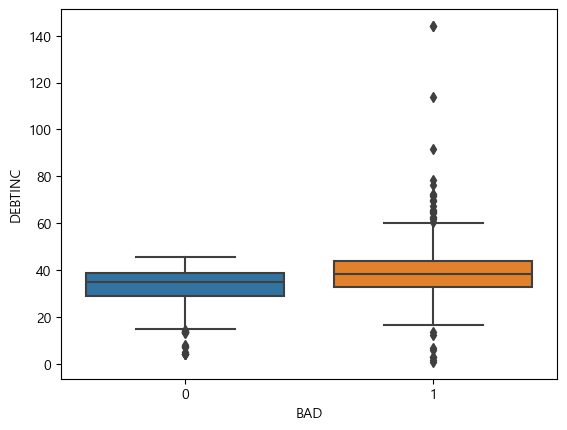

In [47]:
sns.boxplot(x='BAD', y = "DEBTINC",data = df2)   # 대출금 대 수입 비율
plt.show()

In [48]:
BAD_b = df2[df2['BAD'] == 0]['DEBTINC']   # 대출금 대 수입 비율  
good_b = df2[df2['BAD'] == 1]['DEBTINC']  

# 상환 여부에 따라서 금융거래수에 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 대출금 대 수입 비율  차이가 없다 -> 
# 대립가설 : 상환 여부에 따라서 대출금 대 수입 비율 차이가 있다 -> o 

weight_result= stats.ttest_ind(BAD_b,good_b)
t,p = weight_result.statistic, weight_result.pvalue
print("DEBTINC -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

DEBTINC -sample t-test
t:-12.886823506349744
p:3.984168740725602e-37


In [49]:
# 대출금 상환여부에 따라서 차이가 있는것
# 근무년수   /불량거래수 / 채납횟수  / 최장대출기간 /최근 신용도 차이  / 금융거래수 / 대출금 대 수입 비율